<a href="https://colab.research.google.com/github/SyedFarhan110/ML_labs/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [109]:
# !ls '/content/drive/MyDrive/ML_Labs/Lab_2/'
dataset = pd.read_csv('/content/Updated_Synthetic_50_Startups.csv')
dataset.head()

,Research Budget,Admin Costs,Advertisement Budget,Country,Net Profit
0,137454.011885,157566.770221,306285.837137,Germany,198216.834333
1,195071.430641,142010.625869,427282.082253,Germany,151663.589127
2,173199.394181,155159.915325,362871.196215,Australia,126082.917483
3,159865.848420,151586.188034,401714.138233,Canada,199625.369976
4,115601.864044,127831.998305,481513.294785,Canada,196541.935129


In [110]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Research Budget       50 non-null     float64
 1   Admin Costs           50 non-null     float64
 2   Advertisement Budget  50 non-null     float64
 3   Country               50 non-null     object 
 4   Net Profit            50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [111]:
dataset.describe

<bound method NDFrame.describe of     Research Budget    Admin Costs  Advertisement Budget    Country  \
0     137454.011885  157566.770221         306285.837137    Germany   
1     195071.430641  142010.625869         427282.082253    Germany   
2     173199.394181  155159.915325         362871.196215  Australia   
3     159865.848420  151586.188034         401714.138233     Canada   
4     115601.864044  127831.998305         481513.294785     Canada   
5     115599.452034  153749.938802         349858.445830    Germany   
6     105808.361217   87079.400164         382076.584607     Canada   
7     186617.614577   95678.628994         451110.227709     Canada   
8     160111.501174   83618.183113         345759.633098  Australia   
9     170807.257780  106026.426461         315395.981966  Australia   
10    102058.449430  111094.183175         357950.290583  Australia   
11    196990.985216  101707.922542         332244.257451  Australia   
12    183244.264080  146299.000732         485939.530469    Germany   
13    121233.911068  108540.266135         461624.075913  Australia   
14    118182.496721  102474.760775         426680.751302     Canada   
15    118340.450985  123415.686653         474292.118038    Germany   
16    130424.224296   91273.937998         460734.415380     Canada   
17    152475.643163  144175.758460         337314.011777     Canada   
18    143194.501864   85964.051494         478511.799698     Canada   
19    129122.914020  158950.954928         407868.448383  Australia   
20    161185.289472  141779.581544         461488.031033  Australia   
21    113949.386065   95897.254523         479218.259985    Germany   
22    129214.464854   80441.769370         363600.694994    Germany   
23    136636.184329  145236.914276         322010.384906  Australia   
24    145606.998422  136548.587508         345587.032508     Canada   
25    178517.596139  138320.573443         385421.557725    Germany   
26    119967.378216  141701.627735         463602.953184  Australia   
27    151423.443841   85923.572139         472146.116651  Australia   
28    159241.456886  108677.258284         301390.426106  Australia   
29    104645.041272   89269.524762         402149.460516     Canada   
30    160754.485190  149048.274070         383482.200630  Australia   
31    117052.412369  129863.850146         344421.562094  Australia   
32    106505.159299  106471.841988         323973.073467  Australia   
33    194888.553725   85084.668023         367523.034281  Australia   
34    196563.203307  104878.585737         488581.940783    Germany   
35    180839.734812  106014.665762         364640.586404    Germany   
36    130461.376917  138368.494267         403758.124349  Australia   
37    109767.211401  131004.597708         440603.791779     Canada   
38    168423.302651  150977.019406         372725.920476    Germany   
39    144015.249374  117777.194013         494356.416544  Australia   
40    112203.823484   89567.539675         492489.458988    Germany   
41    149517.691011  137059.582978         350356.459165    Germany   
42    103438.852112  140862.803889         399449.701178     Canada   
43    190932.040208  124902.175806         360175.661963  Australia   
44    125877.998160  141677.374396         356968.098875  Australia   
45    166252.228435  119503.647709         307377.389471     Canada   
46    131171.107609  121818.626351         421912.866796     Canada   
47    152006.802118  114203.281469         400535.804646  Australia   
48    154671.027934   82033.530140         310295.750250  Australia   
49    118485.445553   88631.314159         355729.292847     Canada   

       Net Profit  
0   198216.834333  
1   151663.589127  
2   126082.917483  
3   199625.369976  
4   196541.935129  
5   155829.345361  
6   188263.634319  
7   118870.710834  
8   127887.135259  
9   170035.782997  
10  184666.114224  
11  185632.429188  
12  140450.812712  
13  188777.009876  
14  185092.844877  
15  193563.499422  
16  

In [112]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [113]:
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])], remainder='passthrough')
X=ct.fit_transform(X)

In [114]:
print(X)

[[0.00000000e+00 0.00000000e+00 1.00000000e+00 1.37454012e+05
  1.57566770e+05 3.06285837e+05]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 1.95071431e+05
  1.42010626e+05 4.27282082e+05]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 1.73199394e+05
  1.55159915e+05 3.62871196e+05]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 1.59865848e+05
  1.51586188e+05 4.01714138e+05]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 1.15601864e+05
  1.27831998e+05 4.81513295e+05]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 1.15599452e+05
  1.53749939e+05 3.49858446e+05]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 1.05808361e+05
  8.70794002e+04 3.82076585e+05]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 1.86617615e+05
  9.56786290e+04 4.51110228e+05]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 1.60111501e+05
  8.36181831e+04 3.45759633e+05]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 1.70807258e+05
  1.06026426e+05 3.15395982e+05]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 1.0

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.29, random_state = 0)
X_train.shape

(35, 6)

In [116]:
dataset.dropna(inplace=True)

In [117]:
!pip install sklearn
from sklearn.impute import SimpleImputer

# Create an imputer object to replace NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Proceed with fitting your LinearRegression model

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [118]:
multi_regressor = LinearRegression()
multi_regressor.fit(X_train,y_train)

LinearRegression()

In [119]:
y_pred = multi_regressor.predict(X_test)

In [120]:
print(multi_regressor.coef_)
print(multi_regressor.intercept_)

[-7.94032880e+03  8.11461616e+02  7.12886719e+03 -3.61009582e-01
  3.23123469e-02  8.74791653e-02]
176026.26684625566


Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [121]:
print(multi_regressor.predict([[1,0,0,160000,130000,300000]]))

[140768.75966473]


In [122]:
print('Variance score: {}'.format(multi_regressor.score(X_test, y_test)))

Variance score: -0.0767774340988645


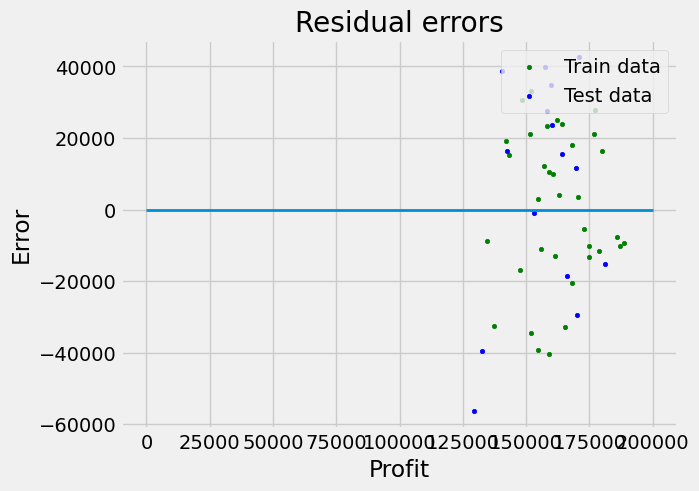

In [123]:
plt.style.use('fivethirtyeight')
plt.scatter(multi_regressor.predict(X_train), multi_regressor.predict(X_train)-y_train, color = "green", s = 10, label = 'Train data')
plt.scatter(multi_regressor.predict(X_test), multi_regressor.predict(X_test)-y_test, color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 200000, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.xlabel("Profit")
plt.ylabel("Error")
plt.show()

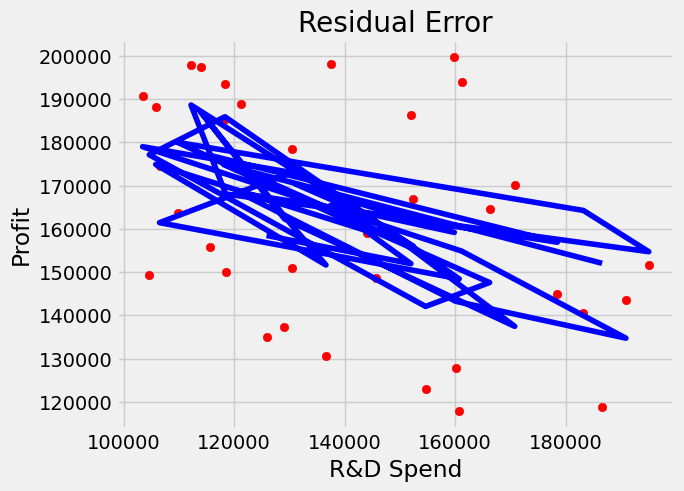

In [124]:
plt.scatter(X_train[:,3],y_train,color='red') # Select the 4th column (index 3) for the x-axis
plt.plot(X_train[:,3],multi_regressor.predict(X_train),color='blue') #Use the same column for plot and use multi_regressor instead of regressor
plt.title("Residual Error")
plt.xlabel("R&D Spend") #Update the x-axis label
plt.ylabel("Profit") #Update the y-axis label to reflect profit
plt.show()

In [125]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 27367.790339281764
MSE: 949006787.5171202
RMSE: 30805.953767366467


**POLYNOMIAL REGRESSION**

In [126]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

In [127]:
poly.fit(X_poly, y_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y_train)

LinearRegression()

In [128]:
y_poly = poly_regressor.predict(poly.fit_transform(X_test))

In [129]:
print(poly_regressor.coef_)
print(poly_regressor.intercept_)

[-1.08424667e-06  8.04004976e-07  5.36555828e-06 -7.67512222e-09
 -1.74670178e-04  1.48253828e-03 -3.92146057e-03  1.17530756e-06
  1.32483900e-08 -4.42522741e-09  8.05608793e-02  7.67104423e-02
  2.27918566e-01 -1.29108398e-06  2.69834350e-12 -8.76409018e-02
 -8.14640571e-02 -2.53908050e-01  9.76084371e-08  6.90569094e-03
  6.23663110e-03  2.20680256e-02  1.33374669e-04 -2.54893352e-05
 -1.00037971e-04  1.66705033e-04 -9.55908164e-05  3.31809439e-05
  1.19346171e-06  5.55111512e-17 -3.46944695e-18  8.05608770e-02
  7.67104424e-02  2.27918566e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  4.45357513e-05
 -2.04815426e-05 -3.12656406e-05  5.01265448e-05 -2.61347736e-05
  9.14559066e-06 -1.29107499e-06  0.00000000e+00 -8.76409018e-02
 -8.14640571e-02 -2.53908050e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.06530055e-06  1.62133559e-05
 -1.00332255e-05  4.35112

In [130]:
print(poly_regressor.coef_.shape) # Use shape for getting dimensions
print(poly_regressor.intercept_)  # Print the intercept value directly

(84,)
197044.67283773012


In [131]:
poly = PolynomialFeatures(degree=2)
# Fit the polynomial features to the training data
X_poly = poly.fit_transform(X_train)
# Use the same fitted object to transform train and test data
poly.fit(X_train) # Correctly fit the polynomial object

poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y_train)


y_poly = poly_regressor.predict(poly.transform(X_test)) # Use transform for X_test

In [132]:
print(poly_regressor.coef_.shape) # Use shape for getting dimensions
print(poly_regressor.intercept_)

(28,)
640981.650273524


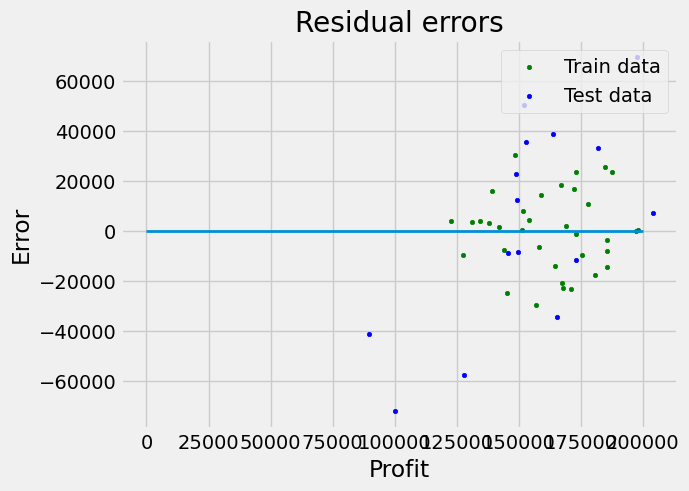

In [133]:
plt.style.use('fivethirtyeight')
# Transform X_train and X_test using poly.transform before prediction
plt.scatter(poly_regressor.predict(poly.transform(X_train)), poly_regressor.predict(poly.transform(X_train))-y_train, color = "green", s = 10, label = 'Train data')
plt.scatter(poly_regressor.predict(poly.transform(X_test)), poly_regressor.predict(poly.transform(X_test))-y_test, color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 200000, linewidth = 2) # Moved to the next line
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.xlabel("Profit")
plt.ylabel("Error")
plt.show()

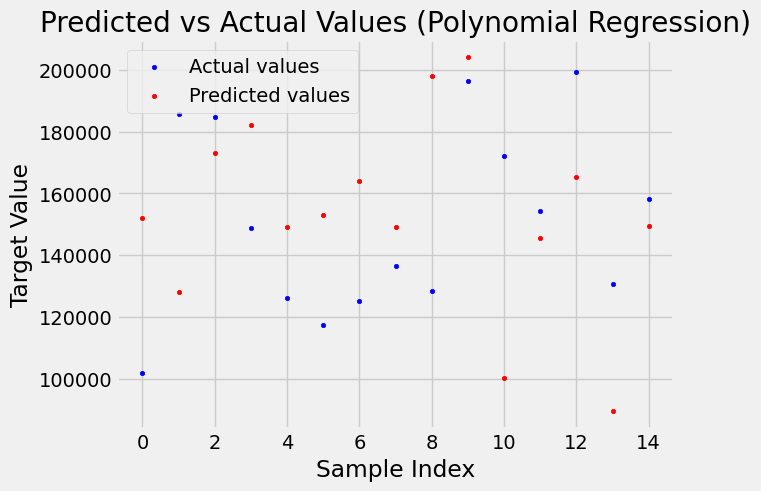

In [134]:
plt.scatter(range(len(y_poly)), y_test, color='blue', label='Actual values', s=10)
plt.scatter(range(len(y_poly)), y_poly, color='red', label='Predicted values', s=10)
plt.title('Predicted vs Actual Values (Polynomial Regression)')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()

In [135]:
print('MAE:', metrics.mean_absolute_error(y_test, y_poly))
print('MSE:', metrics.mean_squared_error(y_test, y_poly))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_poly)))

MAE: 33615.96592203395
MSE: 1574252906.6759994
RMSE: 39676.856058362275


In [137]:
# Select one predictor column (e.g., first feature)
predictor_index = 0  # Change this to select other predictors
X_single = X[:, predictor_index].reshape(-1, 1)



In [138]:
# Create lists to store performance metrics
degrees = [1, 4, 5]  # Polynomial degrees to test
mse_values = []
r2_values = []



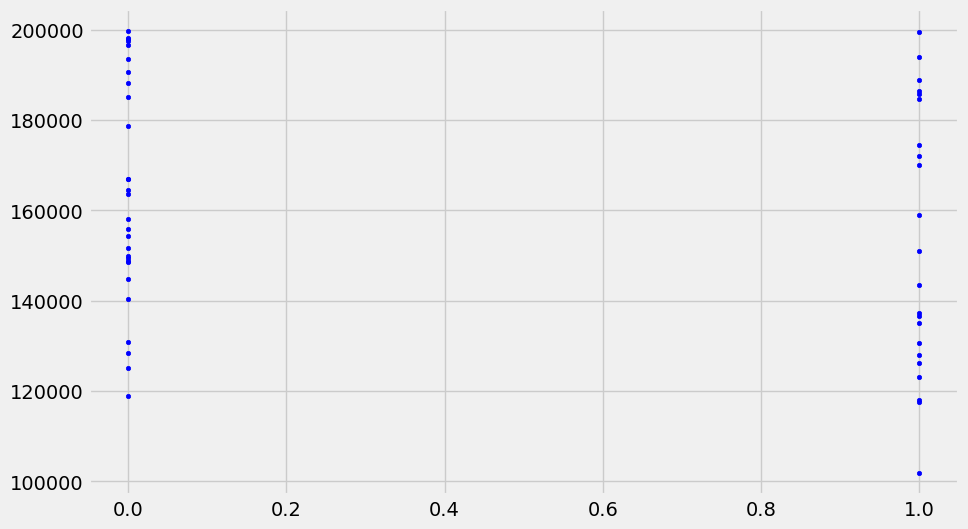

In [139]:
# Plot settings
plt.figure(figsize=(10, 6))
plt.scatter(X_single, y, color='blue', label='Actual Data', s=10)


In [141]:
from sklearn.metrics import mean_squared_error, r2_score # Import necessary functions

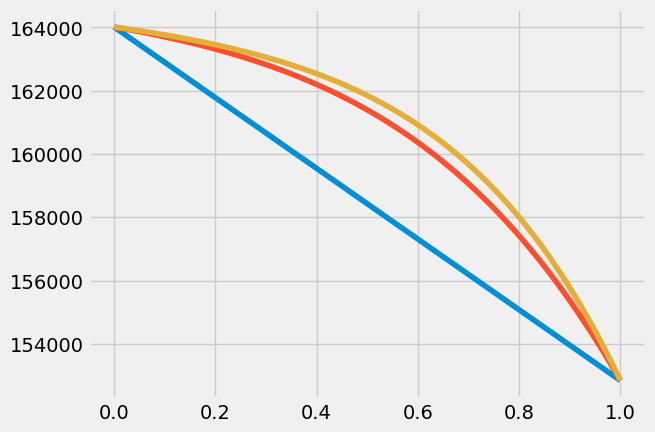

In [142]:
for degree in degrees:
    # Transform the feature to polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_single)

    # Fit the Linear Regression model
    poly_regressor = LinearRegression()
    poly_regressor.fit(X_poly, y)

    # Predict on the same data
    y_pred = poly_regressor.predict(X_poly)

    # Calculate performance metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

    # Plot the polynomial regression fit
    X_grid = np.linspace(min(X_single), max(X_single), 500).reshape(-1, 1)  # Smooth curve
    y_grid = poly_regressor.predict(poly.transform(X_grid))
    plt.plot(X_grid, y_grid, label=f'Degree {degree} (R²={r2:.2f})')



<ipython-input-143-132778fa0c22>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


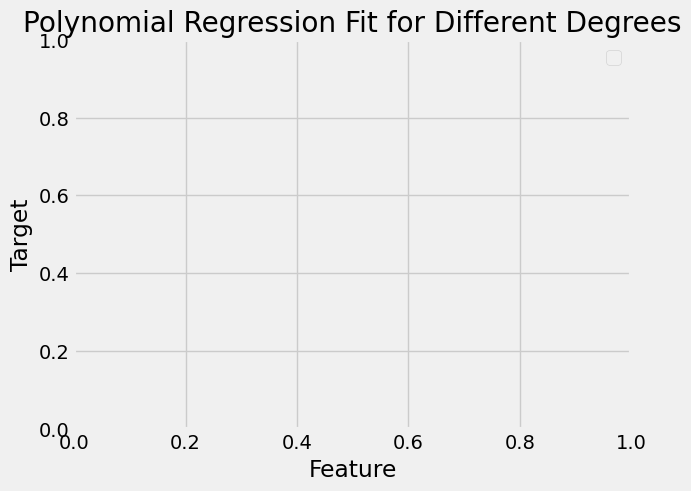

In [143]:

# Add plot details
plt.title('Polynomial Regression Fit for Different Degrees')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

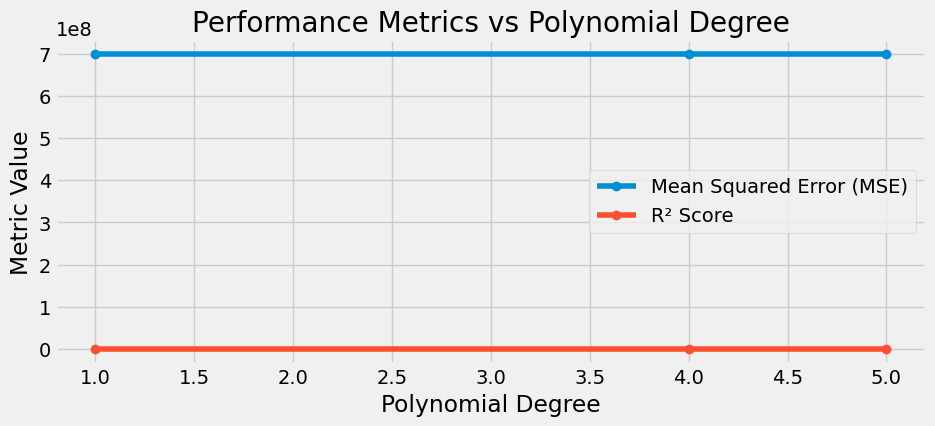

In [144]:
# Plot performance metrics
plt.figure(figsize=(10, 4))
plt.plot(degrees, mse_values, marker='o', label='Mean Squared Error (MSE)')
plt.plot(degrees, r2_values, marker='o', label='R² Score')
plt.title('Performance Metrics vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Metric Value')
plt.legend()
plt.show()